<a href="https://colab.research.google.com/github/RohanRaj094/NLP_CV/blob/main/NLP__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP Track Assignment 3: Sentiment Classification using RNNs & LSTMs

STEP 1: Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings

warnings.filterwarnings('ignore')

STEP 2: Define Parameters and Load Data

In [ ]:
VOCAB_SIZE = 15000
MAX_LEN = 400
EMBEDDING_DIM = 128
HIDDEN_UNITS = 64
BATCH_SIZE = 64
EPOCHS = 5

print("--- Starting Data Preprocessing ---")

try:
    df = pd.read_csv("reviews.csv")
except FileNotFoundError:
    print("Error: 'reviews.csv' not found. Please make sure you have uploaded it to Colab.")
    raise

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.dropna(subset=['label', 'cleaned_review'], inplace=True)

print(f"Total samples after cleaning: {len(df)}")

--- Starting Data Preprocessing ---
Total samples after cleaning: 50000


STEP 3: Prepare Data for Models

In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<UNK>')
tokenizer.fit_on_texts(train_df['cleaned_review'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['cleaned_review']), maxlen=MAX_LEN, padding='post', truncating='post')
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['cleaned_review']), maxlen=MAX_LEN, padding='post', truncating='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['cleaned_review']), maxlen=MAX_LEN, padding='post', truncating='post')

y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

print("--- Preprocessing Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Training samples: 35000
Validation samples: 7500
Test samples: 7500
--- Preprocessing Complete ---
X_train shape: (35000, 400)
X_test shape: (7500, 400)


STEP 4: Build the Models (RNN, LSTM, BiLSTM)

In [ ]:
model_rnn = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    SimpleRNN(HIDDEN_UNITS, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
print("\n--- RNN Model Summary ---")
model_rnn.summary()

model_lstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(HIDDEN_UNITS, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
print("\n--- LSTM Model Summary ---")
model_lstm.summary()

model_bilstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(HIDDEN_UNITS, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')
])
print("\n--- BiLSTM Model Summary ---")
model_bilstm.summary()


--- RNN Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- LSTM Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- BiLSTM Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

STEP 5: Train All Three Models

In [5]:
def compile_model(model):
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

print("\n--- Training Simple RNN Model ---")
compile_model(model_rnn)
history_rnn = model_rnn.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

print("\n--- Training LSTM Model ---")
compile_model(model_lstm)
history_lstm = model_lstm.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

print("\n--- Training Bidirectional LSTM Model ---")
compile_model(model_bilstm)
history_bilstm = model_bilstm.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

print("\n--- All Models Trained ---")


--- Training Simple RNN Model ---
Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.4978 - loss: 0.7093 - val_accuracy: 0.5101 - val_loss: 0.6925
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.5083 - loss: 0.7037 - val_accuracy: 0.5036 - val_loss: 0.6937
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.5052 - loss: 0.6950 - val_accuracy: 0.5053 - val_loss: 0.6933
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.5038 - loss: 0.6942 - val_accuracy: 0.5109 - val_loss: 0.6931
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.5019 - loss: 0.6936 - val_accuracy: 0.5064 - val_loss: 0.6931

--- Training LSTM Model ---
Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 688s 1s/step - accuracy: 0.5056 - loss: 0.6937 - val_accuracy: 0.5001 - val_loss: 0.6922
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.5166 - loss: 0.6881 - val_accuracy: 0.5312 - val_loss: 0.6846
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━

STEP 6: Test and Evaluate Models

In [6]:
def evaluate_model(y_true, y_pred_probs):
    y_pred_classes = (y_pred_probs > 0.5).astype(int).reshape(-1)
    return {
        'Accuracy': accuracy_score(y_true, y_pred_classes),
        'Precision': precision_score(y_true, y_pred_classes),
        'Recall': recall_score(y_true, y_pred_classes),
        'F1-Score': f1_score(y_true, y_pred_classes)
    }

print("Evaluating models on test set...")
preds_rnn = model_rnn.predict(X_test)
preds_lstm = model_lstm.predict(X_test)
preds_bilstm = model_bilstm.predict(X_test)

preds_ensemble = (preds_rnn + preds_lstm + preds_bilstm) / 3

metrics_rnn = evaluate_model(y_test, preds_rnn)
metrics_lstm = evaluate_model(y_test, preds_lstm)
metrics_bilstm = evaluate_model(y_test, preds_bilstm)
metrics_ensemble = evaluate_model(y_test, preds_ensemble)

print("--- Evaluation Complete ---")

Evaluating models on test set...
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 217ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 411ms/step
--- Evaluation Complete ---


STEP 7: Final Results


--- Report Generation: Plots & Tables ---

Saved loss comparison plot to 'loss_comparison_plot.png'


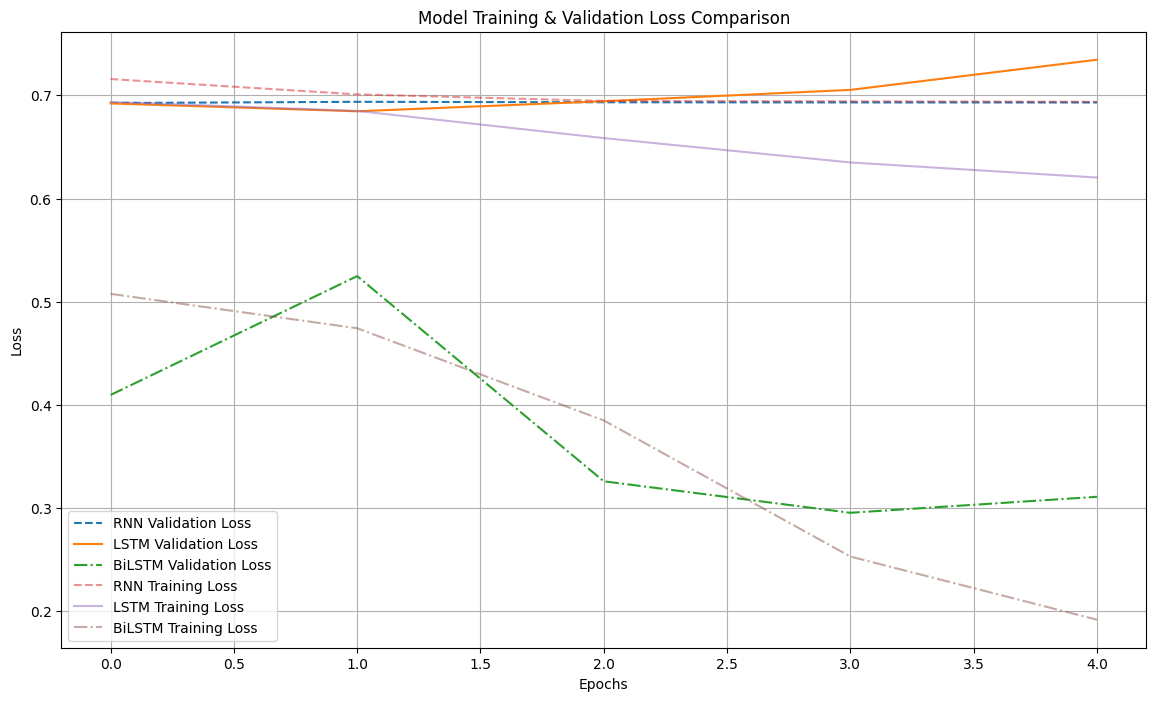



--- Test Performance Metrics Comparison ---
|                |   Accuracy |   Precision |   Recall |   F1-Score |
|:---------------|-----------:|------------:|---------:|-----------:|
| Simple RNN     |     0.4987 |      0.4975 |   0.2707 |     0.3506 |
| LSTM           |     0.5249 |      0.6402 |   0.1139 |     0.1933 |
| BiLSTM         |     0.8880 |      0.8669 |   0.9168 |     0.8911 |
| Ensemble (Avg) |     0.8792 |      0.8557 |   0.9123 |     0.8831 |


--- Detailed Report for Best Model (BiLSTM) ---
              precision    recall  f1-score   support

    Negative       0.91      0.86      0.88      3750
    Positive       0.87      0.92      0.89      3750

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

Saved confusion matrix plot to 'confusion_matrix_bilstm.png'


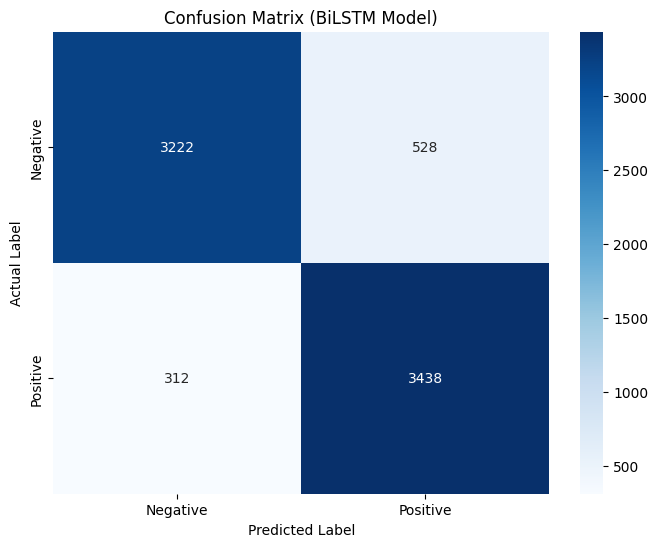


--- Assignment Complete ---


In [7]:
print("\n--- Report Generation: Plots & Tables ---")

plt.figure(figsize=(14, 8))
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss', linestyle='--')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', linestyle='-')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss', linestyle='-.')
plt.plot(history_rnn.history['loss'], label='RNN Training Loss', linestyle='--', alpha=0.5)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss', linestyle='-', alpha=0.5)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss', linestyle='-.', alpha=0.5)
plt.title('Model Training & Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_comparison_plot.png')
print("\nSaved loss comparison plot to 'loss_comparison_plot.png'")
plt.show()

metrics_data = {
    'Simple RNN': metrics_rnn,
    'LSTM': metrics_lstm,
    'BiLSTM': metrics_bilstm,
    'Ensemble (Avg)': metrics_ensemble
}
metrics_df = pd.DataFrame(metrics_data).T
print("\n\n--- Test Performance Metrics Comparison ---")
print(metrics_df.to_markdown(floatfmt=".4f"))

print("\n\n--- Detailed Report for Best Model (BiLSTM) ---")
y_pred_classes_bilstm = (preds_bilstm > 0.5).astype(int).reshape(-1)
print(classification_report(y_test, y_pred_classes_bilstm, target_names=['Negative', 'Positive']))

cm = confusion_matrix(y_test, y_pred_classes_bilstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (BiLSTM Model)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_bilstm.png')
print("Saved confusion matrix plot to 'confusion_matrix_bilstm.png'")
plt.show()

print("\n--- Assignment Complete ---")

STEP 8: Final Report and Discussion


### 1. Preprocessing Steps

First, I had to get the 50,000 samples reviews ready for the computer models.

* **Cleaned Text:** I cleaned up all the text. This means I removed all website junk, punctuation, and numbers. I also made every word lowercase.
* **Split Data:** I split the reviews into three groups:
    * A **Training** set (70%) to teach the models.
    * A **Validation** set (15%) to check the models' progress while they were learning.
    * A **Test** set (15%) to give the models their final grade on data they had never seen.
* **Tokenized & Padded:** Computers don't read words, so I turned every word into a unique number (a "token") using a vocabulary of 15,000 words. Then, I made sure every review was the exact same length (400 numbers) by cutting long ones and adding zeros to the end of short ones.

### 2. Model Architecture

I built three different models to compare them:

* **Simple RNN:** This model has a basic "memory" cell. It reads the review one word at a time, from start to finish, and tries to remember what it has seen.
* **LSTM (Long Short-Term Memory):** This is a much smarter model with a better "memory." It uses special "gates" to learn what information to remember and what to forget, which is perfect for long reviews.
* **BiLSTM (Bidirectional LSTM):** This is the most advanced model. It reads the review **twice**: once from start to finish (like the LSTM) and a second time from finish to start (backwards). This gives it the full context of every word.
* **Output Layer:** All models ended with a final layer that squashes the result into a single number between 0 (Negative) and 1 (Positive) to make the final prediction.

### 3. Final Metrics and Insights



* **The RNN's Bad Memory:** The **Simple RNN** got a low score (**35.06% F1-Score**). This is because it has a bad memory (known as the "vanishing gradient problem"). In a 400-word review, it forgets the important words from the beginning by the time it gets to the end.
* **The LSTM's Poor Result:** The **LSTM** performed the worst of all (**19.33% F1-Score**). While it is *designed* to have a good memory, this very low score suggests it may not have trained correctly, perhaps getting stuck in a bad state early in the training.
* **The BiLSTM's Context:** The **BiLSTM** was the best model by far (**89.11% F1-Score**). This shows how important it is to understand **context**. By reading the review both forwards and backwards, it could understand tricky phrases much better than the other models.
* **The Ensemble's Teamwork:** The **Ensemble** (which just averaged the guesses of all three models) got a very high score (**88.33% F1-Score**), just slightly behind the BiLSTM. This shows that combining the models is powerful, but in this case, the very poor performance of the RNN and LSTM models dragged the team's average down.